<a href="https://colab.research.google.com/github/jeperniag/BussinessIntelligence/blob/main/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se cargan las librerias de trabajo

In [ ]:
#Librerias cientificas
import numpy as np
import pandas as pd

#Librerias Arbol
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#Librerias Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Se procede con la implementación del modelo
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

#Conectar al Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargan los datos

In [ ]:
nxl='/content/drive/MyDrive/4. BD2_NBA_Data_M_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)

# Crear variable de salida
threshold=XDB['games_played'].mean()
XDB['average_games']=np.where(XDB['games_played']>=threshold,1,0)

#Se seleccionan las variables de interés
XDB=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals','average_games']]
XDB.head(10)

#Se separan las variables de entrada y salida
XD=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']] #Variables de Entrada
yd=XDB[['average_games']] #Variable de Salida - Variable Pronóstico - Deseada

XDB=XDB.dropna() #Evitar celdas vacias

num_filas = XDB.shape[0]  # Obtiene el número de filas
num_columnas = XDB.shape[1]  # Obtiene el número de columnas

print("El número de filas es:", num_filas)
print("El número de columnas es:", num_columnas)

# Ahora sí, contar los enfermos
num_encima = XDB["average_games"].sum()
print(f"Número de personas encima del promedio: {num_encima}")

XDB.head(10)


El número de filas es: 445
El número de columnas es: 10
Número de personas encima del promedio: 190


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,average_games
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,1
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1
5,8500000,39,83,240,1425,34.5,3.7,1.4,1.3,1
6,2814000,38,78,205,349,26.3,4.0,0.3,1.4,1
7,250750,40,75,200,939,30.9,6.5,0.2,1.2,1
8,947276,36,80,218,569,27.3,2.6,0.2,0.6,1
9,222888,38,82,250,354,15.8,0.4,0.6,0.4,1


*Descripción de los Datos*
De acuerdo con la base de datos de jugadores de la NBA con juegos jugados, esta posee un total de 445 datos totales, divividos en 190 personas por encima del promedio y 255 personas por debajo del prmomedio de partidos jugados. Cada uno de los jugadores estará descrito en función de 10 variables:

* Salary: Hace referencia a el salario que percibe el jugador.

* Age: Hace referencia a la edad que tiene el jugador.

* Height: Hace referencia a la altura que tiene el jugador.

* Weight: Se refiere al peso del jugador.
Games_started: Se refiere a los partidos donde el jugador ha empezado (titular).

* Minutes_per_game: Se refiere a los minutos jugados (en promedio) del jugador por partido.

* Assists: Hace referencia a las asistencias que tiene el jugador por partido en promedio.

* Blocks: Se refiere a los bloqueos que tiene el jugador por partido en promedio.

* Steals: Se refiere a los robos que tiene el jugador por partido en promedio.

* Average_Games: Es una combinación teniendo en cuenta la variable de games_played y el promedio de esta misma.

•	Determinar la categoría a la que pertenece una persona con las siguientes características mediante la utilización del modelo Naive Bayes: [5000000,37,82,245,45,17.8,0.5,1.4,0.4]


In [ ]:
from sklearn.naive_bayes import GaussianNB #from antes de import es prestamo interbibliotecario

mnb=GaussianNB() #Aloja el modelo - Campana
mnb.fit(XD,yd) #Entrena el modelo - Sacar media, de, valores de pertenencia

#Obtenemos la información del modelo
u=mnb.theta_ #Obtenemos la media
print("La media es:\n",u)
var=mnb.var_ #Obtenemos la varianzas - O2 es la varianza y O es la desviación
sigma=np.sqrt(var) #Se calcula la desviación estandar
print("La desviación es:\n",sigma)

#Se determinan los limites superiores e inferiores
LS=u+sigma
LI=u-sigma
print("El limite superior es:\n",LS)
print("El limite inferior es:\n",LI)

#Evaluamos un jugador
XDS=[5000000,37,82,245,45,17.8,0.5,1.4,0.4] #Como un valor de entrada -
# The following line has been modified to reshape XDS into a 2D array
ydp=mnb.predict([XDS])  #Se obtiene la predicción #se le coloca [] para que lo convierta en un array 2D
print("La predicción de la persona es:\n",ydp)

if ydp==0:
  print("El jugador no está por encima del promedio de partidos jugados")

if ydp==0:
  print("El jugador está por encima del promedio de partidos jugados")


La media es:
 [[2.91582743e+06 2.41607843e+01 7.91647059e+01 2.19423529e+02
  6.52352941e+01 1.82878431e+01 1.46941176e+00 3.88627451e-01
  5.98431373e-01]
 [7.42986398e+06 3.04684211e+01 7.92684211e+01 2.24731579e+02
  4.09294737e+02 2.66994737e+01 2.51473684e+00 5.62105263e-01
  8.41578947e-01]]
La desviación es:
 [[3.40292300e+06 1.65385513e+02 1.65398561e+02 1.67383294e+02
  1.84162559e+02 1.65543171e+02 1.65367971e+02 1.65363234e+02
  1.65363112e+02]
 [6.06849146e+06 1.65399728e+02 1.65397787e+02 1.67405674e+02
  3.31807803e+02 1.65472069e+02 1.65373786e+02 1.65363363e+02
  1.65363133e+02]]
El limite superior es:
 [[6.31875042e+06 1.89546297e+02 2.44563267e+02 3.86806824e+02
  2.49397853e+02 1.83831014e+02 1.66837383e+02 1.65751861e+02
  1.65961544e+02]
 [1.34983554e+07 1.95868149e+02 2.44666208e+02 3.92137252e+02
  7.41102540e+02 1.92171542e+02 1.67888523e+02 1.65925468e+02
  1.66204712e+02]]
El limite inferior es:
 [[-4.87095568e+05 -1.41224728e+02 -8.62338555e+01  5.20402352e+0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


2.1 Se evalua el desempeño del modelo Naive Bayes

In [ ]:
from sklearn.metrics import confusion_matrix

#Haga un barrido de los datos
vdp=mnb.predict(XD) #Haga el pronóstico para los datos base

cm=confusion_matrix(yd,vdp) #Cree la matriz de confusión
print("La matriz de confusión es:\n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

#Metricas Desempeño
Ex=(VP+VN)/(VP+VN+FP+FN) #Exactitud : Comportamiento general urbano
print("La exactitud del modelo es:\n",Ex)

TE=(FN+FP)/(VP+VN+FP+FN) #Tasa de Error
print("El error del modelo es:\n",TE)

Se=VP/(VP+FN) #Sensibilidad : Comportamiento correcto urbano
              #Sobre el total de los urbanos
print("La sensibilidad del modelo es:\n",Se)

Sp=VN/(VN+FP) #Especificidad : Comportamiento correcto no urbano
              #Sobre el total de los no urbanos (rurales)
print("La especificidad del modelo es:\n",Sp)

Ur=VP/(VP+FP) #Precisión : Comportamiento correcto urbano
             #Sobre el total del FP + VP pronóstico
print("La precisión del modelo es:\n",Ur)

Ru=VN/(VN+FN) #Precisión Negativa : Comportamiento correcto no urbano
               #Sobre el total del FN + VN pronóstico
print("La precisión negativa del modelo es:\n",Ru)

La matriz de confusión es:
 [[236  19]
 [ 76 114]]
La exactitud del modelo es:
 0.7865168539325843
El error del modelo es:
 0.21348314606741572
La sensibilidad del modelo es:
 0.6
La especificidad del modelo es:
 0.9254901960784314
La precisión del modelo es:
 0.8571428571428571
La precisión negativa del modelo es:
 0.7564102564102564


* Se procede con la implementación del modelo de Árboles de Decisión

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd) #Ajustar el modelo entre la entrada y la salida

#Se procede con la gráfica
from pydotplus import graph_from_dot_data #Me crea la gráfica
from sklearn.tree import export_graphviz #Me exporta a PNG, JPEG, TIFF.

ve=['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals'] #Nombres para el Árbol
dot_data=export_graphviz(mar,feature_names=ve) #Crear el gráfico
graph=graph_from_dot_data(dot_data)
graph.write_png('4. ArbolDecision_M.png') #Exportar a PNG

True

2.2 Se evalua comportamiento del modelo de Árboles de Decisión

In [ ]:
ydp=mar.predict(XD) #Prónostico sobre la base de datos original
cm=confusion_matrix(yd,ydp) #Matriz de confusión
print("La matriz de confusión es:\n", cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precisión=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
PredNeg=VN/(VN+FN) #Tasa de F
PredPos=VP/(VP+FP) #Tasa de V

print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)
print("La precisión es:",Precisión)
print("La tasa de error es:",TasaError)
print("La tasa de predicción negativa es:",PredNeg)

La matriz de confusión es:
 [[247   8]
 [ 12 178]]
La exactitud es: 0.9550561797752809
La sensibilidad es: 0.9368421052631579
La especificidad es: 0.9686274509803922
La precisión es: 0.956989247311828
La tasa de error es: 0.0449438202247191
La tasa de predicción negativa es: 0.9536679536679536


* Empezamos con el modelo K-Means

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

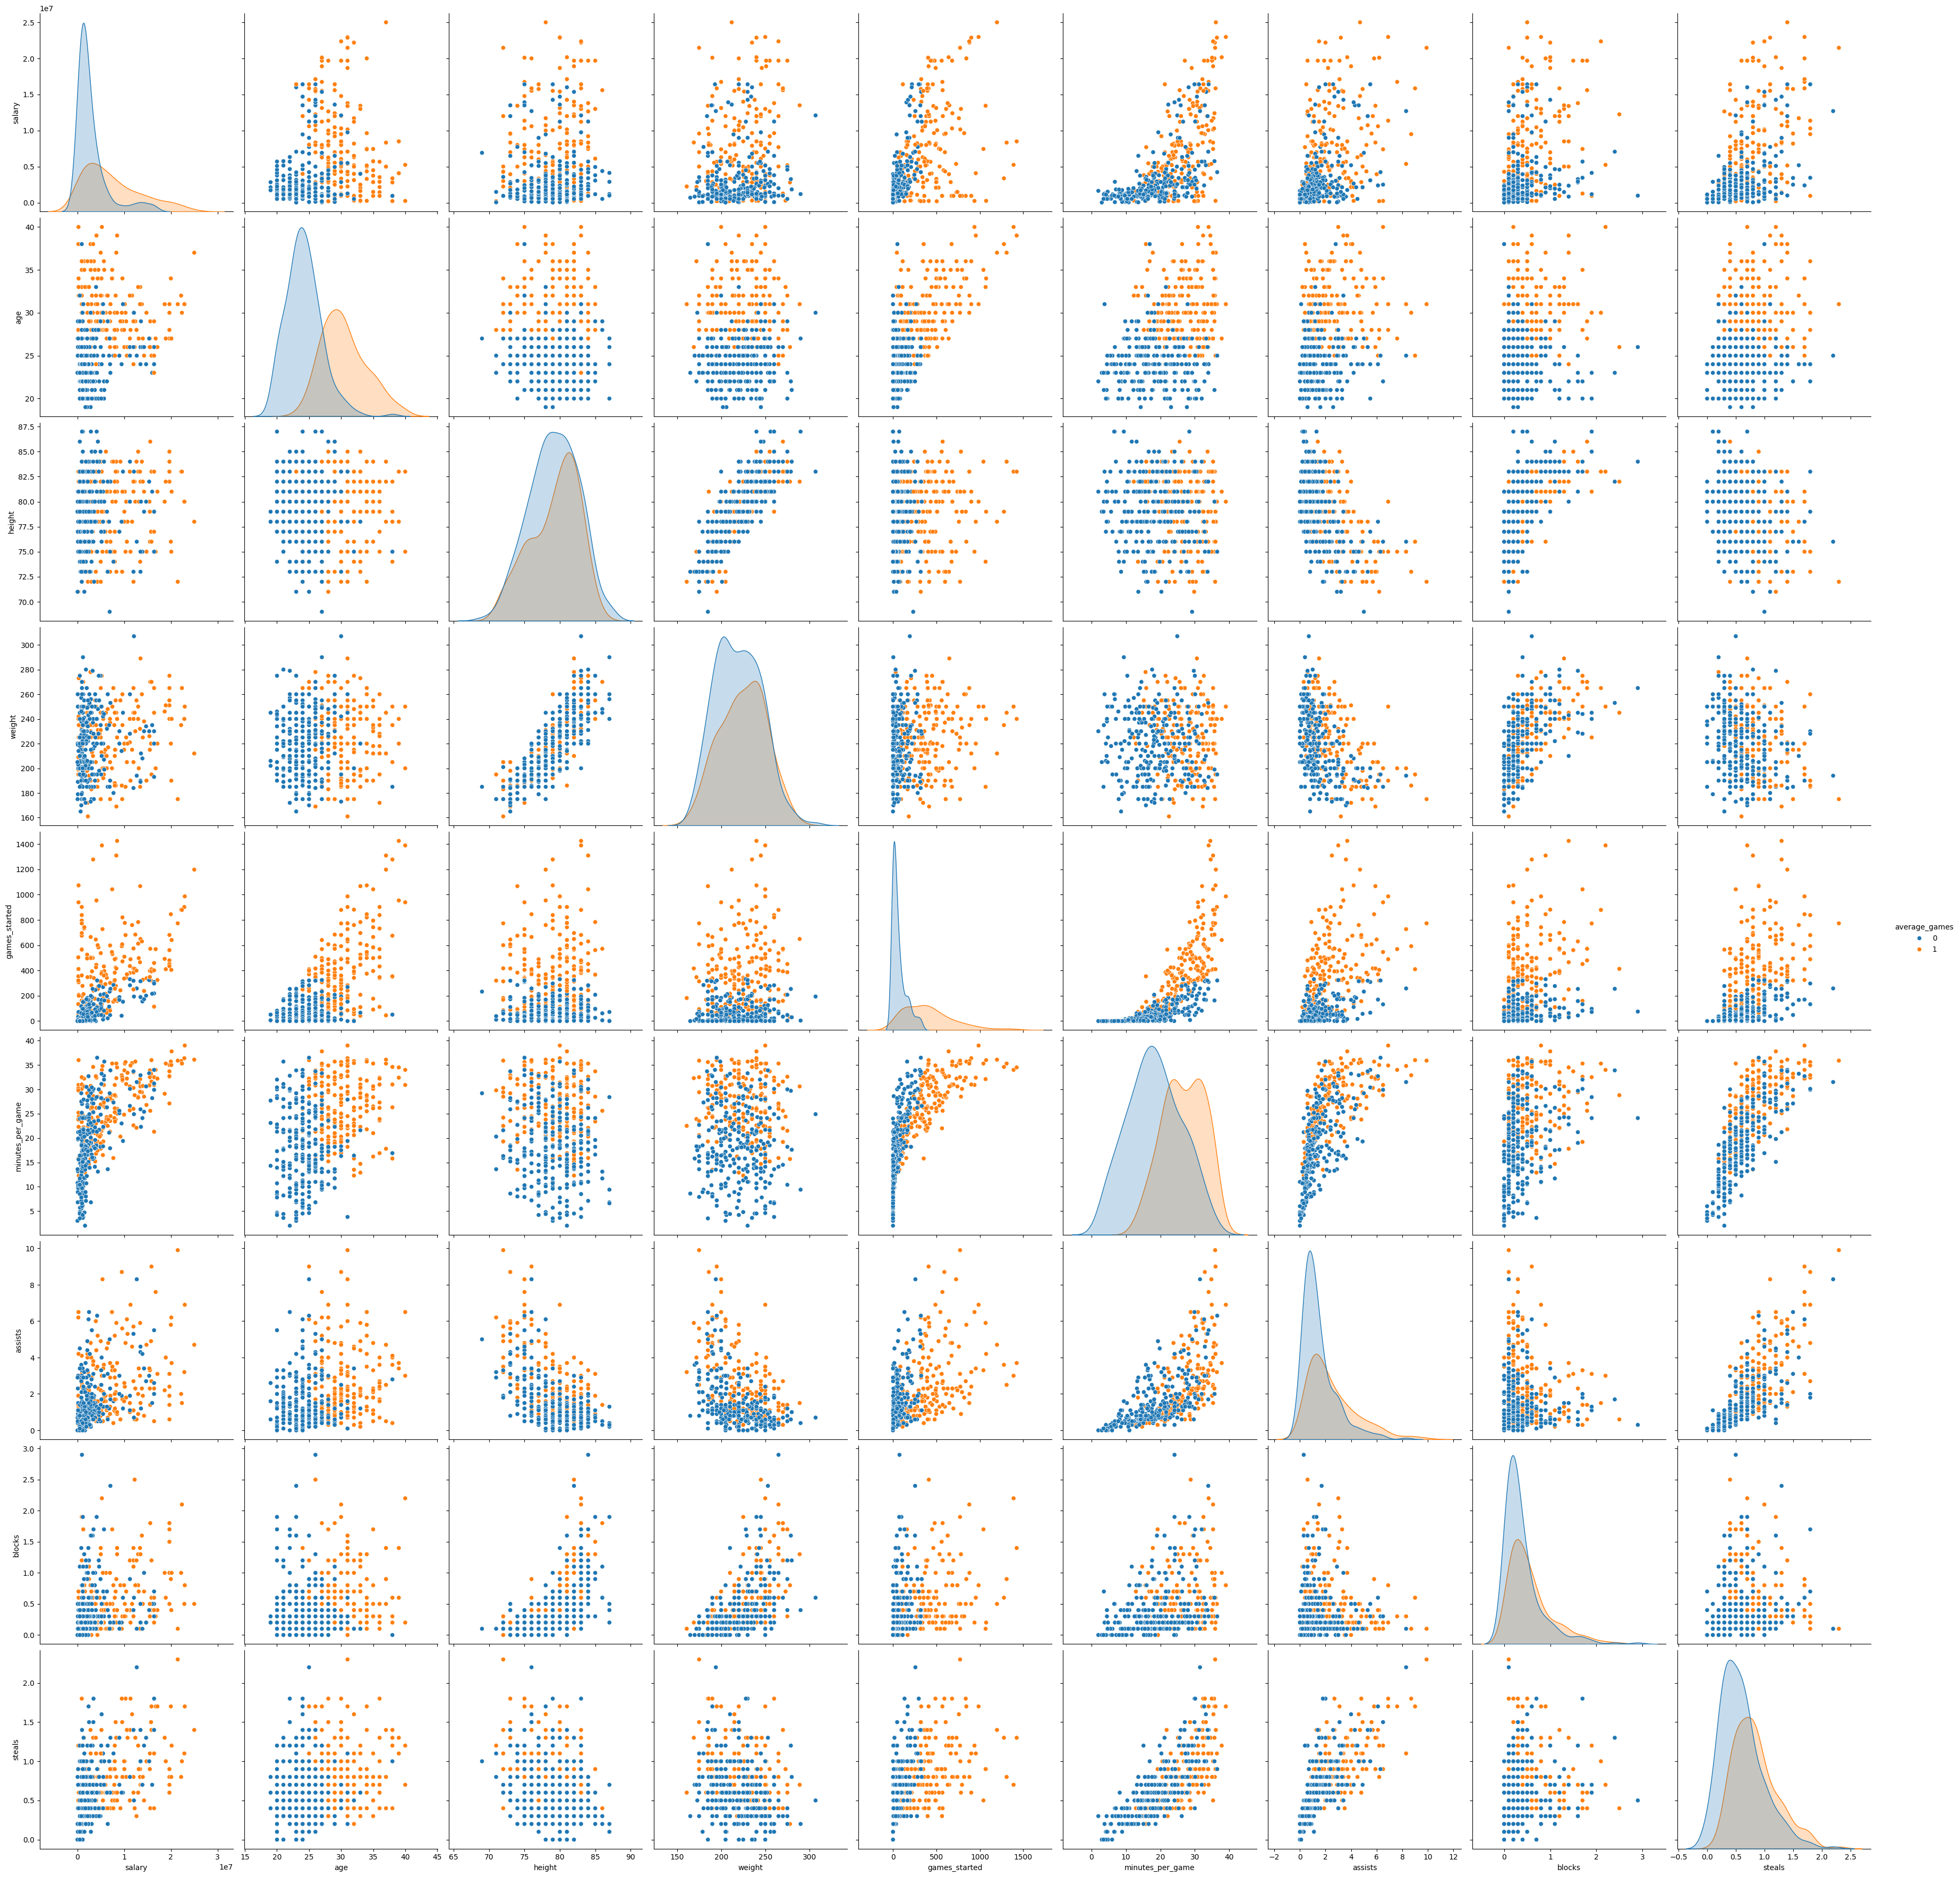

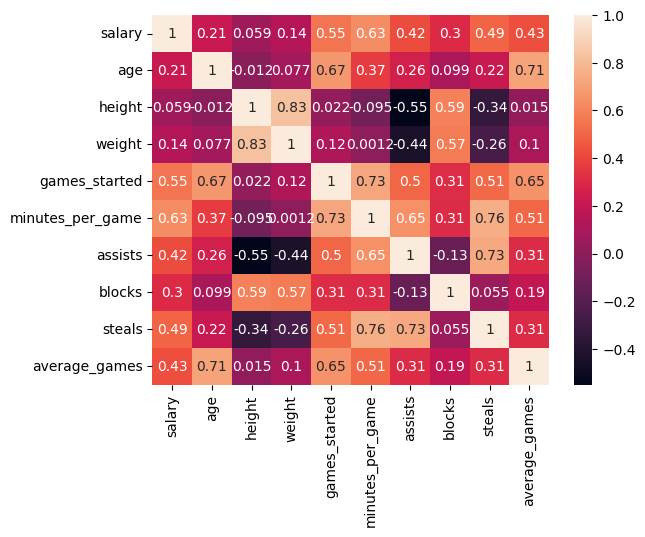

In [ ]:
#Para mirar correlaciones y variables importantes
plt.figure()
sns.pairplot(XDB,hue='average_games',size=4,vars=['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals'])
plt.show()

#¿Y cuáles son las correlaciones?
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()

* Se procede con la implementación del modelo de clusterización

In [ ]:
XD=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']]
yd=XDB[['average_games']]

#Se van a crear cinco montoncitos de datos (perfiles de crédito)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=5,init='random',random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
print("Los centroides son:\n",centroids)

#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels
display(XDB)

#Caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es:\n",ND)
NApr=XDB.groupby('labels').agg({"average_games":lambda x:(x==1).sum()})
NNeg=XDB.groupby('labels').agg({"average_games":lambda x:(x==0).sum()})
print("El número encima del promedio por cluster es:\n",NApr)
print("El número de no encima del promedio por cluster es:\n",NNeg)

#Se procede con la estimación de los porcentajes de preaprobación
NApr['average_games']=NApr['average_games']/ND
NNeg['average_games']=NNeg['average_games']/ND
print("El porcentaje que supera el numero de minutos jugados en promedio por cluster es:\n",NApr)
print("El porcentaje que no supera el numero de minutos jugados en promedio por cluster es:\n",NNeg)

Los centroides son:
 [[1.39398411e+07 2.73469388e+01 7.95510204e+01 2.27857143e+02
  3.96040816e+02 2.98061224e+01 3.04693878e+00 6.93877551e-01
  1.05306122e+00]
 [3.97672950e+06 2.74684685e+01 7.95135135e+01 2.24126126e+02
  2.02702703e+02 2.34585586e+01 1.87027027e+00 4.92792793e-01
  7.04504505e-01]
 [2.08213350e+07 3.00625000e+01 8.04375000e+01 2.38125000e+02
  6.88687500e+02 3.45312500e+01 3.71875000e+00 9.62500000e-01
  1.11875000e+00]
 [8.03340889e+06 2.86964286e+01 7.86250000e+01 2.19392857e+02
  3.61410714e+02 2.70196429e+01 2.61071429e+00 4.85714286e-01
  8.67857143e-01]
 [1.16304555e+06 2.56948357e+01 7.90328638e+01 2.18370892e+02
  9.97042254e+01 1.69309859e+01 1.36103286e+00 3.50234742e-01
  5.45539906e-01]]


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,average_games,labels
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,1,4
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1,2
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1,1
...,...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,0,4
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,0,4
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,0,4
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,0,1


El tamaño de los clusters es:
 [ 49 111  16  55 214]
El número encima del promedio por cluster es:
         average_games
labels               
0                  33
1                  52
2                  16
3                  43
4                  46
El número de no encima del promedio por cluster es:
         average_games
labels               
0                  16
1                  59
2                   0
3                  12
4                 168
El porcentaje que supera el numero de minutos jugados en promedio por cluster es:
         average_games
labels               
0            0.673469
1            0.468468
2            1.000000
3            0.781818
4            0.214953
El porcentaje que no supera el numero de minutos jugados en promedio por cluster es:
         average_games
labels               
0            0.326531
1            0.531532
2            0.000000
3            0.218182
4            0.785047


2.3 Se evalua el desempeño del modelo de clusterización

In [ ]:
ydp=np.zeros((len(XD),1))
Vapr=np.array(NApr);Vneg=np.array(NNeg)

for k in range(len(XD)):
 napr=labels[k]

 print("La persona tal:",k)
 print("El cluster al que pertenece es:",napr)
 print("El porcentaje de encima del promedio es:",Vapr[napr])
 print("El porcentaje de no encima del promedio es:",Vneg[napr])
#Consolidamos la información de los enfermos y no enfermos
 if Vapr[napr]>Vneg[napr]:
  ydp[k]=1
 else:
    ydp[k]=0

#Se evalua el modelo
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exactitud=(VN+VP)/(VN+FP+FN+VP)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)
TasaError=(FP+FN)/(VN+FP+FN+VP)
PredNeg=VN/(VN+FP)

print("La exactitud es:",Exactitud)
print("La sensibilidad es:",Sensibilidad)
print("La especificidad es:",Especificidad)
print("La precisión es:",Precision)
print("La tasa de error es:",TasaError)


La persona tal: 0
El cluster al que pertenece es: 4
El porcentaje de encima del promedio es: [0.21495327]
El porcentaje de no encima del promedio es: [0.78504673]
La persona tal: 1
El cluster al que pertenece es: 2
El porcentaje de encima del promedio es: [1.]
El porcentaje de no encima del promedio es: [0.]
La persona tal: 2
El cluster al que pertenece es: 1
El porcentaje de encima del promedio es: [0.46846847]
El porcentaje de no encima del promedio es: [0.53153153]
La persona tal: 3
El cluster al que pertenece es: 1
El porcentaje de encima del promedio es: [0.46846847]
El porcentaje de no encima del promedio es: [0.53153153]
La persona tal: 4
El cluster al que pertenece es: 1
El porcentaje de encima del promedio es: [0.46846847]
El porcentaje de no encima del promedio es: [0.53153153]
La persona tal: 5
El cluster al que pertenece es: 3
El porcentaje de encima del promedio es: [0.78181818]
El porcentaje de no encima del promedio es: [0.21818182]
La persona tal: 6
El cluster al que pe

•	Determinar la categoría a la que pertenece una persona con las siguientes características mediante la utilización del modelo Clustering: [5000000,37,82,245,45,17.8,0.5,1.4,0.4]

In [ ]:

Xdm= [[5000000,37,82,245,45,17.8,0.5,1.4,0.4]]
print("La persona pertenece al cluster:",mkm.predict(Xdm))
print("El porcentaje de estar encima del promedio es:",Vapr[mkm.predict(Xdm)])
print("El porcentaje de estar por debajo del promedio es:",Vneg[mkm.predict(Xdm)])




La persona pertenece al cluster: [1]
El porcentaje de estar encima del promedio es: [[0.46846847]]
El porcentaje de estar por debajo del promedio es: [[0.53153153]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


#**Análisis de Resultados**
Para la clasificación de datos mediante los métodos de Naive Bayes, Árboles de Decisión y Clusterización (Kmeans) se tomaron un total de 9 variables  de entrada (Salary, Age, Height, Weight, games_started, minutes_per_game, assits, blocks, steals), y se toma una variable explicativa determinada por "average_games" que da cuenta si el jugador de la NBA tiene más partidos jugados que el promedio o no.


* En el comportamiento en el modelo Naive Bayes, el modelo alcanzó una exactitud cercana al 80% en promedio (78,6%), lo que demuestra un comportamiento aceptable frente a los jugadores que están por encima del promedio de juegos jugados. De igual manera, es relevante destacar, que el modelo tuvo una especificidad muy alta (92,6%), lo que muestra un buen comportamiento frente a los jugadores que están por debajo del promedio en juegos jugados. Por lo que a modo general, se puede decir que tiene el modelo tiene un buen desempeño en la identificación de los jugadores, donde se tiene una tas de error del 21%, pero el modelo de Árbol de Decisión es mucho mejor en este escenario. Este es mejor para identificar los que están por debajo y por encima de la variable average_games.

* En cuanto al comportamiento en el modelo de Árboles de Decisión, su exactitud cerca al 96% (95,5%), nos da a entender que es un modelo que se comporta bien a la hora de indentificar a los jugadores que tienen un promedio mayor al normal. Además, esto lo corrobora su tasa de error del 4% que es muy baja, de igual manera, también podemos observar la sensibilidad (93%) que nos da a entender que el modelo funciona correctamente a la hora de indentificar a los estudiantes admitidos. Asimismo, tiene una especificidad muy alta (96,8%) que nos da a entender que el modelo es bueno para identificar a los jugadores que están por debajo del promedio en partidos jugados.
Finalmente, respecto a este modelo se puede decir que es el mejor ya que su comportamieto es correcto y tiene una tasa de error muy baja.

* Para este modelo K-Means se tomaron un total de 5 cluster como referencia, esto con el fin de asociar cada cluster a cinco valores cualitativos (Muy Bajo, Bajo, Medio, Alto y Muy Alto) en función de la cantidad de datos que estos agrupan. De esta manera se encontró que la variable que tenía mayor relevancia con respecto a la variable de Average_Games era la variable Age (Edad) con una correlación cercana al 71%. De igual forma, también mostró  buena correlación con la variable games_started (65%), lo que indica que a mayor número de juegos iniciados, es probable tener un promedio alto en juegos jugados. Con respecto al average_games, el cluster donde se encuentran la mayor cantidad de los que superan al promedio fue el cluster 1, sin embargo el cluster 3 tiene el mayor porcentaje (78%) de jugadores por encima del promedio. Con respecto a la aprobación el modelo K-Means alcanzó una sensibilidad del 48% demostrando de cierta forma su limitación a la hora de filtrar jugadores con partidos más jugados, mientras que frente a la negación del modelo alcanzó una especificidad cercana al 89%, lo que muestra la tendencia del modelo a que los jugadores estén por debajo del promedio (average_games=0).  